# National CO2 Emission Dataset

All the estimations in the dataset is expresssed in  million metric tons of carbon. To
convert these estimates to units of carbon dioxide (CO2), simply multiply
these estimates by 3.667.

Importing required libaries

In [153]:
#Executing the codes
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults
from datetime import datetime
import statsmodels.tsa.api as smt
from pylab import rcParams
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
import seaborn as sns
#Set style
sns.set()
rcParams['figure.figsize'] = 12, 7

# Stage1:Data Preprocessing

Loading the natioanl dataset

In [154]:
data = pd.read_csv(r"C:\Users\Lenovo\Documents\GitHub\ProgrammingForDataScienceProject\Data\national1751_2014.csv")
data.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,AFGHANISTAN,1949,4,4,0,0,0,.,.,0
1,AFGHANISTAN,1950,23,6,18,0,0,0,0,0
2,AFGHANISTAN,1951,25,7,18,0,0,0,0,0
3,AFGHANISTAN,1952,25,9,17,0,0,0,0,0
4,AFGHANISTAN,1953,29,10,18,0,0,0,0,0


The dataset includes 10 columns with 17232 rows

In [155]:
data.shape
#return size of rows and cols

(17232, 10)

In [156]:
data.columns
#return the columns names

Index(['Nation', 'Year',
       'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)',
       'Emissions from solid fuel consumption',
       'Emissions from liquid fuel consumption',
       'Emissions from gas fuel consumption',
       'Emissions from cement production', 'Emissions from gas flaring',
       'Per capita CO2 emissions (metric tons of carbon)',
       'Emissions from bunker fuels (not included in the totals)'],
      dtype='object')

Check for data types

In [157]:
#Execution Code
data.dtypes

Nation                                                                                     object
Year                                                                                        int64
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)     int64
Emissions from solid fuel consumption                                                      object
Emissions from liquid fuel consumption                                                     object
Emissions from gas fuel consumption                                                        object
Emissions from cement production                                                            int64
Emissions from gas flaring                                                                 object
Per capita CO2 emissions (metric tons of carbon)                                           object
Emissions from bunker fuels (not included in the totals)                                    int64
dtype: object

In [160]:
data["Nation"] = data["Nation"].astype("string")
data["Emissions from solid fuel consumption"] = pd.to_numeric(data["Emissions from solid fuel consumption"],errors='coerce')
data["Emissions from liquid fuel consumption"] = pd.to_numeric(data["Emissions from liquid fuel consumption"],errors='coerce')
data["Emissions from gas fuel consumption"] = pd.to_numeric(data["Emissions from gas fuel consumption"],errors='coerce')
data["Emissions from gas flaring"] = pd.to_numeric(data["Emissions from gas flaring"],errors='coerce')
data["Per capita CO2 emissions (metric tons of carbon)"] = pd.to_numeric(data["Per capita CO2 emissions (metric tons of carbon)"],errors='coerce')

In [161]:
#Check the result
data.dtypes

Nation                                                                                      string
Year                                                                                         int64
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)      int64
Emissions from solid fuel consumption                                                      float64
Emissions from liquid fuel consumption                                                     float64
Emissions from gas fuel consumption                                                        float64
Emissions from cement production                                                             int64
Emissions from gas flaring                                                                 float64
Per capita CO2 emissions (metric tons of carbon)                                           float64
Emissions from bunker fuels (not included in the totals)                                     int64
dtype: obj

Check for missing values

In [162]:
#Executiing the Code
data.isna().sum()

Nation                                                                                        0
Year                                                                                          0
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)       0
Emissions from solid fuel consumption                                                       204
Emissions from liquid fuel consumption                                                      204
Emissions from gas fuel consumption                                                         204
Emissions from cement production                                                              0
Emissions from gas flaring                                                                 4770
Per capita CO2 emissions (metric tons of carbon)                                           4904
Emissions from bunker fuels (not included in the totals)                                      0
dtype: int64

We found some missing values in our national dataset. In the next step, we are going to fix them properly.

In [163]:
# mark missing values "." as missing or NaN
data = data.replace('.', nan)
# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)

In [164]:
# check the result
print(data.isnull().sum())

Nation                                                                                     0
Year                                                                                       0
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)    0
Emissions from solid fuel consumption                                                      0
Emissions from liquid fuel consumption                                                     0
Emissions from gas fuel consumption                                                        0
Emissions from cement production                                                           0
Emissions from gas flaring                                                                 0
Per capita CO2 emissions (metric tons of carbon)                                           0
Emissions from bunker fuels (not included in the totals)                                   0
dtype: int64


We use fillna() to replace missing values with the mean value for each column and there is no missing values finally.

In [165]:
#Check the result
data.head(10)

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,276.163457,1.268883,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.000000,0.000000,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.000000,0.000000,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.000000,0.000000,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.000000,0.000000,0
5,AFGHANISTAN,1954,29,12.0,18.0,0.0,0,0.000000,0.000000,0
6,AFGHANISTAN,1955,42,17.0,25.0,0.0,0,0.000000,0.000000,0
7,AFGHANISTAN,1956,50,17.0,33.0,0.0,0,0.000000,0.010000,0
8,AFGHANISTAN,1957,80,21.0,59.0,0.0,0,0.000000,0.010000,0
9,AFGHANISTAN,1958,90,25.0,65.0,0.0,0,0.000000,0.010000,0


Removed unused columns

There will be 2 columns that we will be removing:

1. 'Per capita CO2 emissions (metric tons of carbon)'
2. 'Emissions from bunker fuels (not included in the totals)'

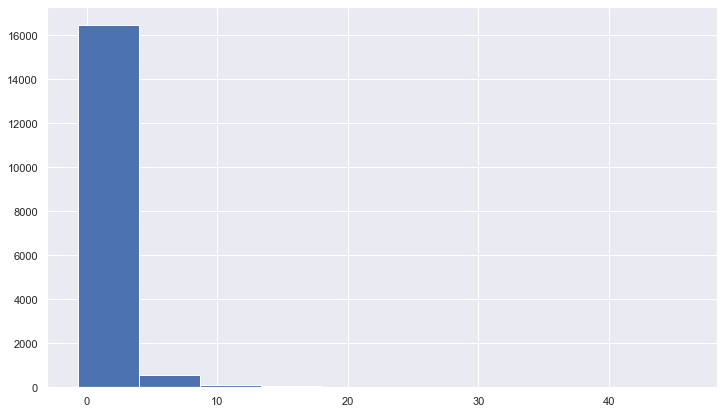

In [166]:
data['Per capita CO2 emissions (metric tons of carbon)'].hist(bins=10);

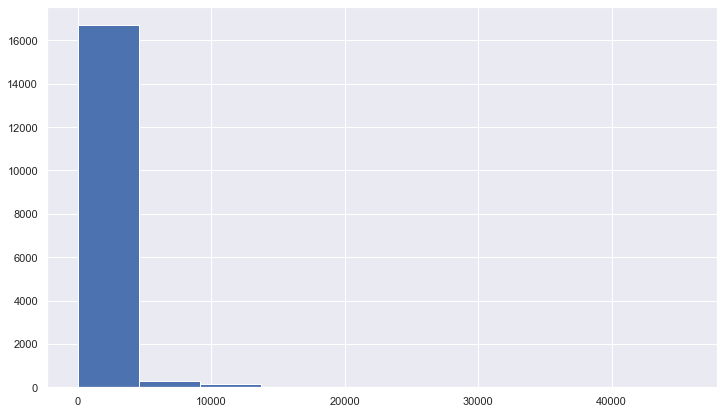

In [167]:
data['Emissions from bunker fuels (not included in the totals)'].hist(bins=10);

As can be seen the histogram plots above there are no outliers in the data of displayed two columns. In similar with global dataset,data for global per capita are not available before 1950. So, unavailable information in the datataset can lead to worng prediction.That is why we decided to remove.
'Emissions from bunker fuels' cannot be included in the calculation because we are going to predict the CO2 emission from rom Fossil-Fuel Burning,Cement Manufacture, and Gas Flaring and it does not included in the totals. Therefor we can safely remove it as well.

In [168]:
#Code execution
#Dropping the unused columns
data.drop(columns='Per capita CO2 emissions (metric tons of carbon)', inplace=True)
data.drop(columns='Emissions from bunker fuels (not included in the totals)', inplace=True)

In [169]:
#Check result code
data.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,276.163457
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.000000
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.000000
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.000000
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.000000


Text(0.5, 0, 'Emissions from gas flaring')

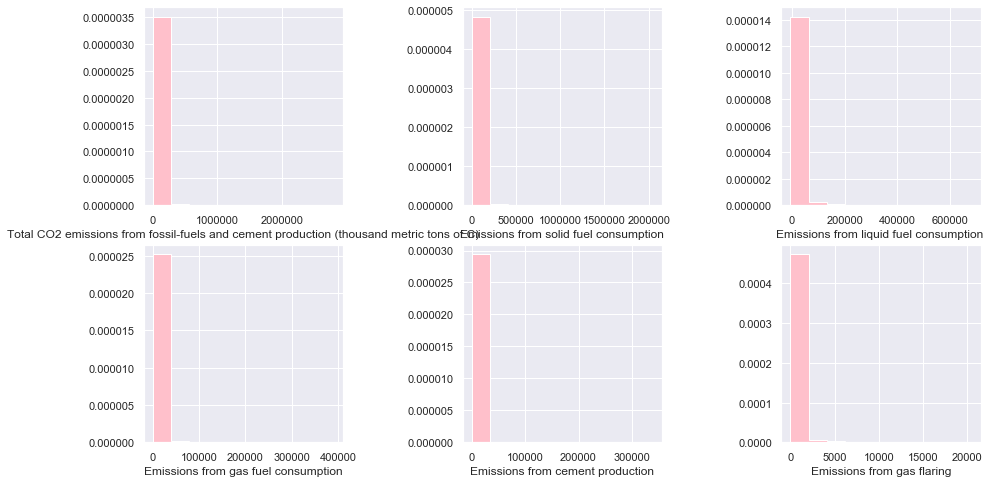

In [170]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.2, wspace=0.6)

plt.subplot(231)
plt.hist( data['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)")


plt.subplot(232)
plt.hist( data['Emissions from solid fuel consumption'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Emissions from solid fuel consumption")

plt.subplot(233)
plt.hist( data['Emissions from liquid fuel consumption'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Emissions from liquid fuel consumption ")

plt.subplot(234)
plt.hist( data['Emissions from gas fuel consumption'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Emissions from gas fuel consumption")

plt.subplot(235)
plt.hist( data['Emissions from cement production'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Emissions from cement production")

plt.subplot(236)
plt.hist( data['Emissions from gas flaring'],bins=10, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Emissions from gas flaring")

Above histograms show that our data are on a finer scale. Additionally, there are no outliers included in this observation

Setting Year as index

In [171]:
#Execution code
data = data.set_index('Year')

In [176]:
#Check result code
data.head(500)

,Nation,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring
Year,,,,,,,
1949,AFGHANISTAN,4,4.0,0.0,0.0,0,276.163457
1950,AFGHANISTAN,23,6.0,18.0,0.0,0,0.000000
1951,AFGHANISTAN,25,7.0,18.0,0.0,0,0.000000
1952,AFGHANISTAN,25,9.0,17.0,0.0,0,0.000000
1953,AFGHANISTAN,29,10.0,18.0,0.0,0,0.000000
...,...,...,...,...,...,...,...
1935,ARGENTINA,3821,1729.0,1705.0,288.0,98,276.163457
1936,ARGENTINA,4121,1907.0,1852.0,249.0,113,276.163457
1937,ARGENTINA,4562,2227.0,1959.0,236.0,141,276.163457


Now, we set 'Year' as a index of national dataset then we can use time serires analysis model on it.

# Stage 2:Data Analysis

Basic Data Analysis

In [174]:
#Execution code
data.describe()

,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring
count,1.723200e+04,1.723200e+04,17232.000000,17232.000000,17232.000000,17232.000000
mean,2.268712e+04,1.120272e+04,7680.005109,3227.981971,638.453865,276.163457
std,1.132419e+05,6.205335e+04,39049.094114,20711.513384,6631.010202,1080.840474
min,-1.473000e+03,-1.030000e+02,-4663.000000,-40.000000,0.000000,0.000000
25%,1.170000e+02,0.000000e+00,25.000000,0.000000,0.000000,0.000000
50%,9.645000e+02,6.900000e+01,293.000000,0.000000,7.000000,0.000000
75%,8.059250e+03,2.277500e+03,2523.500000,123.000000,162.000000,276.163457
max,2.806634e+06,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000


We can see that our data looks fine, most of columns count is at 17232. This means that there are no missing values.

Visualization Analysis


In [108]:
#Counting the number of each country in the Nation
city_count  = data['Nation'].value_counts()
print(city_count)

UNITED KINGDOM                        264
CANADA                                230
UNITED STATES OF AMERICA              215
POLAND                                215
FRANCE (INCLUDING MONACO)             207
                                     ... 
REPUBLIC OF SOUTH SUDAN                 3
CURACAO                                 3
BONAIRE, SAINT EUSTATIUS, AND SABA      3
PUERTO RICO                             1
KUWAITI OIL FIRES                       1
Name: Nation, Length: 256, dtype: Int64


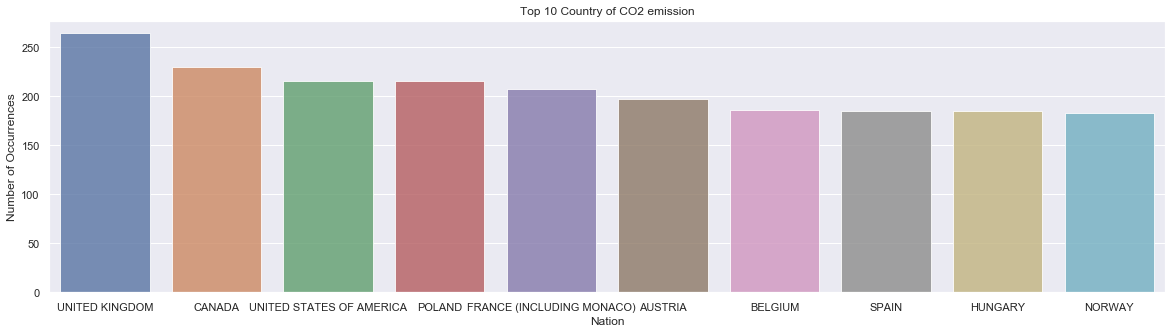

In [114]:
# Plotting a bar graph of the number of each country, for the first ten cities listed in the column "Nation"
city_count = city_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 10 Country of CO2 emission')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Nation', fontsize=12)
plt.show()

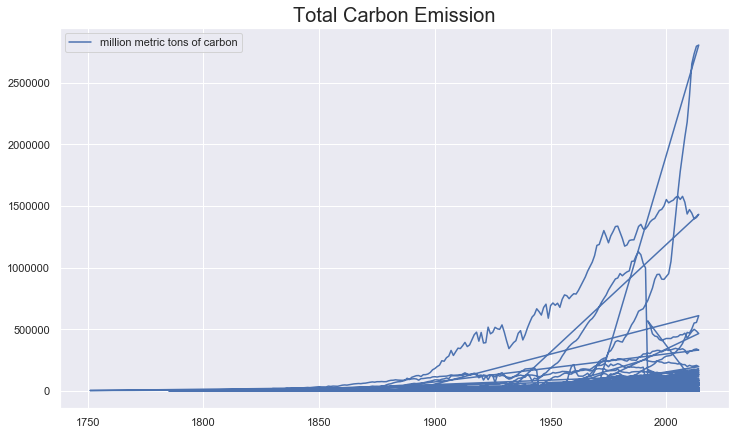

In [175]:
#Visualizing code
plt.figure()

ax = plt.axes()
ax.set_title('Total Carbon Emission', fontsize=20)
ax.plot(data['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'], label= 'million metric tons of carbon');
ax.legend()

# Changing Data Types

In [9]:
data["Nation"] = data["Nation"].astype("string")

In [10]:
data["Emissions from solid fuel consumption"] = pd.to_numeric(data["Emissions from solid fuel consumption"],errors='coerce')

In [11]:
data["Emissions from liquid fuel consumption"] = pd.to_numeric(data["Emissions from liquid fuel consumption"],errors='coerce')

In [12]:
data["Emissions from gas fuel consumption"] = pd.to_numeric(data["Emissions from gas fuel consumption"],errors='coerce')

In [13]:
data["Emissions from gas flaring"] = pd.to_numeric(data["Emissions from gas flaring"],errors='coerce')

In [14]:
data["Per capita CO2 emissions (metric tons of carbon)"] = pd.to_numeric(data["Per capita CO2 emissions (metric tons of carbon)"],errors='coerce')

In [15]:
data.dtypes

Nation                                                                                      string
Year                                                                                         int64
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)      int64
Emissions from solid fuel consumption                                                      float64
Emissions from liquid fuel consumption                                                     float64
Emissions from gas fuel consumption                                                        float64
Emissions from cement production                                                             int64
Emissions from gas flaring                                                                 float64
Per capita CO2 emissions (metric tons of carbon)                                           float64
Emissions from bunker fuels (not included in the totals)                                     int64
dtype: obj

In [16]:
#find missing values
data.isna().sum()

Nation                                                                                        0
Year                                                                                          0
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)       0
Emissions from solid fuel consumption                                                       204
Emissions from liquid fuel consumption                                                      204
Emissions from gas fuel consumption                                                         204
Emissions from cement production                                                              0
Emissions from gas flaring                                                                 4770
Per capita CO2 emissions (metric tons of carbon)                                           4904
Emissions from bunker fuels (not included in the totals)                                      0
dtype: int64

# There are missing values in our national dataset. We need to replace NaN values or blank spaces with 0

In [17]:
#data is numeric, fill missing values with mean
#data['Per capita CO2 emissions (metric tons of carbon)'].fillna(data['Per capita CO2 emissions (metric tons of carbon)'].mean(),inplace=True)

In [18]:
data['Emissions from gas flaring'] = data['Emissions from gas flaring'].fillna(0)

In [19]:
data['Per capita CO2 emissions (metric tons of carbon)'] = data['Per capita CO2 emissions (metric tons of carbon)'].fillna(0)

In [20]:
data['Emissions from solid fuel consumption'] = data['Emissions from solid fuel consumption'].fillna(0)

In [21]:
data['Emissions from liquid fuel consumption'] = data['Emissions from liquid fuel consumption'].fillna(0)

In [22]:
data['Emissions from gas fuel consumption'] = data['Emissions from gas fuel consumption'].fillna(0)

In [23]:
#to check still missing values are available or not
data.isna().sum()

Nation                                                                                     0
Year                                                                                       0
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)    0
Emissions from solid fuel consumption                                                      0
Emissions from liquid fuel consumption                                                     0
Emissions from gas fuel consumption                                                        0
Emissions from cement production                                                           0
Emissions from gas flaring                                                                 0
Per capita CO2 emissions (metric tons of carbon)                                           0
Emissions from bunker fuels (not included in the totals)                                   0
dtype: int64

In [24]:
data.notnull()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
17227,True,True,True,True,True,True,True,True,True,True
17228,True,True,True,True,True,True,True,True,True,True
17229,True,True,True,True,True,True,True,True,True,True
17230,True,True,True,True,True,True,True,True,True,True


In [25]:
data.describe()

,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
count,17232.000000,1.723200e+04,1.723200e+04,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000
mean,1961.579561,2.268712e+04,1.107010e+04,7589.085829,3189.767700,638.453865,199.718489,0.907776,560.330606
std,44.251691,1.132419e+05,6.206518e+04,39057.928585,20714.456024,6631.010202,1087.880733,2.194268,2414.320487
min,1751.000000,-1.473000e+03,-1.030000e+02,-4663.000000,-40.000000,0.000000,0.000000,-0.680000,0.000000
25%,1944.000000,1.170000e+02,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,9.645000e+02,5.400000e+01,263.000000,0.000000,7.000000,0.000000,0.130000,4.000000
75%,1995.000000,8.059250e+03,2.002500e+03,2165.750000,71.000000,162.000000,0.000000,1.010000,133.000000
max,2014.000000,2.806634e+06,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000,45.960000,45630.000000


In [26]:
data.dtypes

Nation                                                                                      string
Year                                                                                         int64
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)      int64
Emissions from solid fuel consumption                                                      float64
Emissions from liquid fuel consumption                                                     float64
Emissions from gas fuel consumption                                                        float64
Emissions from cement production                                                             int64
Emissions from gas flaring                                                                 float64
Per capita CO2 emissions (metric tons of carbon)                                           float64
Emissions from bunker fuels (not included in the totals)                                     int64
dtype: obj